## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1")

X = df[["age", "chol"]]
y = df["diagnosis"]

logistic_model = Pipeline(
  [("standardize", StandardScaler()),
  ("logistic", LogisticRegression())]
)

logistic_model_fitted = logistic_model.fit(X, y)

logistic_age_coef = logistic_model_fitted.named_steps["logistic"].coef_[0][0]
logistic_chol_coef = logistic_model_fitted.named_steps["logistic"].coef_[0][1]
logistic_intercept = logistic_model_fitted.named_steps["logistic"].intercept_[0]

age_mean = logistic_model_fitted.named_steps["standardize"].mean_[0]
age_scale = logistic_model_fitted.named_steps["standardize"].scale_[0]
chol_mean = logistic_model_fitted.named_steps["standardize"].mean_[1]
chol_scale = logistic_model_fitted.named_steps["standardize"].scale_[1]

age_55_std = (55 - age_mean) / age_scale

chol_std_at_50 = -(logistic_intercept + logistic_age_coef * age_55_std) / logistic_chol_coef
chol_at_50 = chol_std_at_50 * chol_scale + chol_mean

chol_std_at_90 = (np.log(0.9 / 0.1) - logistic_intercept - logistic_age_coef * age_55_std) / logistic_chol_coef
chol_at_90 = chol_std_at_90 * chol_scale + chol_mean

print(chol_at_50, "\n", chol_at_90)

367.71778753271246 
 1582.1355182254888


## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = df[["age", "chol"]]
y = df["diagnosis"]

lda_model = Pipeline(
  [("standardize", StandardScaler()),
  ("lda", LinearDiscriminantAnalysis())]
)

lda_model_fitted = lda_model.fit(X, y)

lda_age_coef = lda_model_fitted.named_steps["lda"].coef_[0][0]
lda_chol_coef = lda_model_fitted.named_steps["lda"].coef_[0][1]
lda_intercept = lda_model_fitted.named_steps["lda"].intercept_[0]

age_mean = lda_model_fitted.named_steps["standardize"].mean_[0]
age_scale = lda_model_fitted.named_steps["standardize"].scale_[0]
chol_mean = lda_model_fitted.named_steps["standardize"].mean_[1]
chol_scale = lda_model_fitted.named_steps["standardize"].scale_[1]

age_55_std = (55 - age_mean) / age_scale

chol_std_at_50 = -(lda_intercept + lda_age_coef * age_55_std) / lda_chol_coef
chol_at_50 = chol_std_at_50 * chol_scale + chol_mean

print(chol_at_50)

368.2353575299383


## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

X = df[["age", "chol"]]
y = df["diagnosis"]

param_grid = {"svc__C": [0.01, 0.1, 1, 10, 100]}

svc_pipeline = Pipeline(
  [("standardize", StandardScaler()),
  ("svc", SVC(kernel="linear", probability=True))]
)

svc_pipeline_grid = GridSearchCV(svc_pipeline, param_grid, cv=5)
svc_pipeline_grid.fit(X, y)

svc_pipeline_best = svc_pipeline_grid.best_estimator_
svc_model_best = svc_pipeline_best.named_steps["svc"]

svc_age_coef  = svc_model_best.coef_[0][0]
svc_chol_coef = svc_model_best.coef_[0][1]
svc_intercept = svc_model_best.intercept_[0]

age_mean = svc_pipeline_best.named_steps["standardize"].mean_[0]
age_scale = svc_pipeline_best.named_steps["standardize"].scale_[0]
chol_mean = svc_pipeline_best.named_steps["standardize"].mean_[1]
chol_scale = svc_pipeline_best.named_steps["standardize"].scale_[1]

age_55_std = (55 - age_mean) / age_scale

chol_std_at_50 = -(svc_intercept + svc_age_coef * age_55_std) / svc_chol_coef
chol_at_50 = chol_std_at_50 * chol_scale + chol_mean

print(chol_at_50)

312.75313016443647


## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

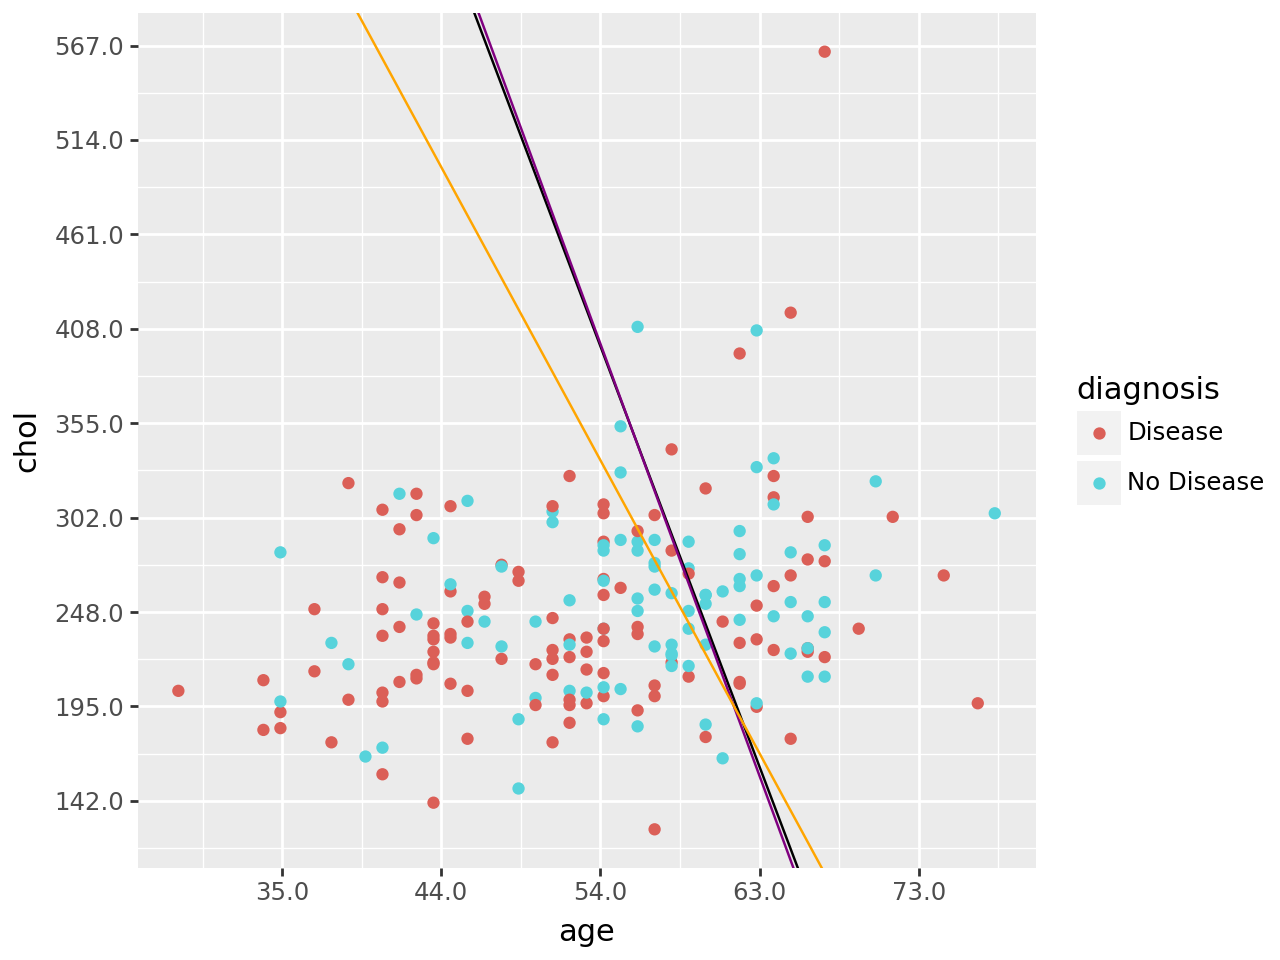

In [18]:
import plotnine as p9

df["age_std"] = (df["age"] - df["age"].mean()) / df["age"].std()
df["chol_std"] = (df["chol"] - df["chol"].mean()) / df["chol"].std()

(p9.ggplot(df, p9.aes(x="age_std", y="chol_std", color="diagnosis")) +
p9.geom_point() +
p9.geom_abline(intercept = - logistic_intercept / logistic_chol_coef, slope = - logistic_age_coef / logistic_chol_coef, color = "black") +
p9.geom_abline(intercept = - lda_intercept / lda_chol_coef, slope = - lda_age_coef / lda_chol_coef, color = "purple") +
p9.geom_abline(intercept = - svc_intercept / svc_chol_coef, slope = - svc_age_coef / svc_chol_coef, color = "orange") +
p9.scale_x_continuous(breaks = np.arange(-2, 3), labels = np.round(df["age"].mean() + df["age"].std() * np.arange(-2, 3), 0)) +
p9.scale_y_continuous(breaks = np.arange(-2, 7), labels = np.round(df["chol"].mean() + df["chol"].std() * np.arange(-2, 7), 0)) +
p9.labs(x = "age", y = "chol")
)